In [27]:
#Gerekli kütüphaneleri projeme ekledim
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [28]:
from sklearn.preprocessing import MinMaxScaler #Verileri 0 ile 1 arasında oranlamak için preprocessing kullandım 

In [29]:
from tensorflow.keras.models import Sequential, load_model #Ardışık model oluşturmak için keras.models kullandım 

In [30]:
from tensorflow.keras.layers import LSTM, Dense, Dropout #sinir ağları oluşturmak için keras.layers apisini kullandım

In [31]:
import os # işletim sistemine eriştim

In [32]:
import tensorflow as tf #tensorflow kütüphanesini tf olarak atadım
tf.__version__#versiyonunu kontrol ettim

'2.9.1'

In [33]:
df=pd.read_csv(r"C:")#pandas kütüphanesini kullanarak apple hisselerinin olduğu csvyi tablolaştırdım 
df.head()#tablonun ilk satırlarını gösterdim

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [34]:
df = df['open'].values #hisselerin açılış fiyatının değerlerini df ye atadım 
df= df.reshape(-1,1)#df yi 1 boyutlu bir dizi olarak yeniden şekillendirdim 
print(df.shape)#df yi yazdırdım 
df[:7]#df nin ilk 7 elemanlını sıralattırdım 

(1259, 1)


array([[67.7142],
       [68.0714],
       [68.5014],
       [66.7442],
       [66.3599],
       [66.9785],
       [65.8714]])

In [35]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])#df nin bir kısmını eğitim dataseti olarak ayırdım
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])#df nin bir kısmını test dataseti olarak ayırdım

In [36]:
dataset_test.shape #test datasetini kontrol ettim

(302, 1)

In [37]:
scaler = MinMaxScaler(feature_range=(0,1))#veri aralığını 0 1 arası yapıp scaler a atadım
dataset_train = scaler.fit_transform(dataset_train)#eğitim datasetini scalerla 0 1 arası olarak değştirdim
dataset_train[:7]# ilk 7 elemanını yazdırdım

array([[0.15550899],
       [0.16002875],
       [0.16546966],
       [0.1432353 ],
       [0.13837263],
       [0.14619996],
       [0.1321915 ]])

In [38]:
dataset_test = scaler.transform(dataset_test)#test datasetini scaler kullanarak 0 1 arasında belirttim
dataset_test[:7]# ilk 7 elemanını sıralattım

array([[0.7048619 ],
       [0.70865789],
       [0.70043325],
       [0.71080895],
       [0.69518213],
       [0.68006144],
       [0.69056368]])

In [39]:
def create_my_dataset(df):#data set oluşturmak için bu metodu yazdım
    x = []#x boyutunu oluşturdum
    y=  []#y boyutunu oluşturdum
    for i in range(50,df.shape[0]):#sıfırdan 50 ye tara
            x.append(df[i-50:i,0])#değerleri x e ata
            y.append(df[i,0]) # değerleri y ye ata         
    x=np.array(x)# x dizisini x e atadım
    y=np.array(y)# y dizisini y e atadım
    return x,y# method değer olarak x ve y yi döndürüyor

In [40]:
x_train,y_train = create_my_dataset(dataset_train)#eğitim datasetinin x ve y boyutlarını oluşturdum
x_train[:1]#diziyi sıralattırdım

array([[0.15550899, 0.16002875, 0.16546966, 0.1432353 , 0.13837263,
        0.14619996, 0.1321915 , 0.12602681, 0.10489581, 0.11077074,
        0.11908522, 0.10095558, 0.10928904, 0.10137187, 0.09043563,
        0.07199725, 0.06057385, 0.08412669, 0.06603248, 0.07561229,
        0.07552245, 0.08609681, 0.07317274, 0.0810899 , 0.09030909,
        0.09667117, 0.12929896, 0.1255384 , 0.11252448, 0.12040496,
        0.13868011, 0.14003654, 0.12380363, 0.11180072, 0.09748478,
        0.07163663, 0.07845043, 0.08277153, 0.06603248, 0.06666515,
        0.06939446, 0.07254007, 0.08269814, 0.08347632, 0.07055098,
        0.06073581, 0.0583861 , 0.03076649, 0.        , 0.00844228]])

In [41]:
x_train[:1].shape# x kısmını kontrol ettim

(1, 50)

In [42]:
x_test,y_test=create_my_dataset(dataset_test)#test datasetini oluşturdum
x_test[:1]# x kısmını sıralattırdım

array([[0.7048619 , 0.70865789, 0.70043325, 0.71080895, 0.69518213,
        0.68006144, 0.69056368, 0.68423703, 0.68120024, 0.70144551,
        0.71979279, 0.73219302, 0.73915233, 0.75433628, 0.7586384 ,
        0.7724305 , 0.76395279, 0.77584689, 0.77660608, 0.7709121 ,
        0.7612956 , 0.77306316, 0.78571645, 0.77217743, 0.77470809,
        0.76395279, 0.76458545, 0.76547118, 0.77635302, 0.79115737,
        0.80153307, 0.80115347, 0.80311474, 0.80583519, 0.79609216,
        0.81709663, 0.80950465, 0.82279061, 0.81709663, 0.81140264,
        0.82241101, 0.83822763, 0.84417468, 0.82886419, 0.83164791,
        0.90604929, 0.91800665, 0.9222455 , 0.93262121, 0.95046235]])

In [43]:
#x_train.shape
#(957,50,1)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))#x_train dizisini yeniden şekillendirdim
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))#x_test dizisini yeniden şekillendirdim
print(x_train.shape)#x_trainin şeklini yazdırdım
print(x_test.shape)#x_testin şeklini yazdırdım

(957, 50, 1)
(252, 50, 1)


In [44]:
model = Sequential()#ardışık model
model.add(LSTM(units=96,return_sequences=True, input_shape=(x_train.shape[1],1)))#96 düğüm layerlar arası ardışıklık doğru
#Sistemin tek zaman biriminde girdi olarak tek özellik(fiyat) almasını sağladım 
model.add(Dropout(0.2))#modelin overfitting olmasını engellemek için layer başında yüzde 20 dropout ekledim
model.add(LSTM(units=96, return_sequences=True))#2.katman
model.add(Dropout(0.2))
model.add(LSTM(units=96))#3.katman
model.add(Dropout(0.2))
model.add(Dense(units=1))#bütün düğümleri birbirine bağlayan dense katmanı

In [45]:
model.summary()#modelimin özetini çıkarttım

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 96)            37632     
                                                                 
 dropout_3 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_4 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_4 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_5 (LSTM)               (None, 96)                74112     
                                                                 
 dropout_5 (Dropout)         (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [49]:
model.compile(loss = 'mean_squared_error', optimizer='adam')#Modelimin ne kadar doğru çalıştığını görmek için Ortalama Kare hatasını kullandım 
#optimizer olarak adam optimizerini kullandım

In [50]:
if(not os.path.exists(r"C:")):#Modelin çıktılarını görmek için işletim sistemin belirlediğim adreste dosya oluşturdum 
    model.fit(x_train,y_train, epochs=50, batch_size=32)#modelin 50 adımda 32 şer örnekle çalışması
    model.save(r"C:5")#belirtilen adrese modeli kaydet

In [51]:
model = load_model(r'C:')


8/8 [==============================] - 2s 37ms/step
range(1007, 1259)


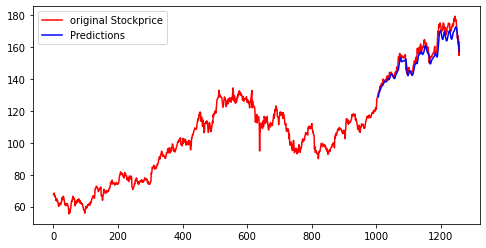

In [52]:
predictions = model.predict(x_test)#Tahminleri görebilmek için tahminleri predictions değişkenine atadım 
predictions = scaler.inverse_transform(predictions)#Modele sokarken 0 ile 1 arasında belirttiğin değerleri tekrar eski haline dönüştürdüm 
#Mathplotlib kullanarak tahminlerin asıl değerlere olan oranını görselleştirdim 
fig,ax = plt.subplots(figsize = (8,4))
plt.plot(df,color='red', label='original Stockprice')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)),predictions, color='blue',label='Predictions')
plt.legend()
print(range(len(y_train)+50,len(y_train)+50+len(predictions)))

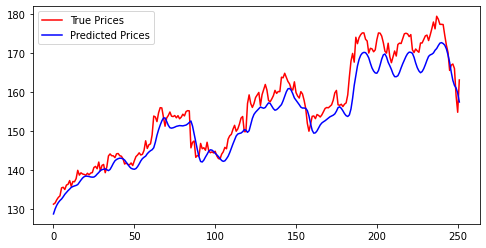

In [53]:
#Eğitilmiş modele tüm verileri tahmin ettirdim ve asıl verilere olan oranını grafikleştirdim 
y_test_scaled =scaler.inverse_transform(y_test.reshape(-1,1))
fig,ax =plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color= 'red',label = 'True Prices')
plt.plot(predictions,color='blue',label = 'Predicted Prices')
plt.legend()